# 混合ベルヌーイ分布による手書き文字分類

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randint, rand
numpy.random.seed(10)

## Parameters

In [2]:
K = 3   # 分類する文字数
N = 10  # 反復回数

## 分類結果の表示

In [3]:
def show_figure(mu, cls):
    fig = plt.figure()
    for c in range(K):
        subplot = fig.add_subplot(K,7,c*7+1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.set_title('Master')
        subplot.imshow(mu[c].reshape(28,28), cmap=plt.cm.gray_r)
        i = 1
        for j in range(len(cls)):
            if(cls[j] == c):
                subplot = fig.add_subplot(K,7,c*7+i+1)
                subplot.set_xticks([])
                subplot.set_yticks([])
                subplot.imshow(df.ix[j].reshape(28,28), cmap=plt.cm.gray_r)
                i += 1
                if(i > 6):
                    break
    fig.show()

## ベルヌーイ分布

In [4]:
def bern(x, mu):
    r = 1.0
    for x_i, mu_i in zip(x, mu):
        if(x_i == 1):
            r *= mu_i 
        else:
            r *= (1.0 - mu_i)
    return(r)

## Main

U:\Application\WinPython\python-3.5.2\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


iter_num 0
iter_num 1
iter_num 2
iter_num 3
iter_num 4
iter_num 5
iter_num 6
iter_num 7
iter_num 8
iter_num 9


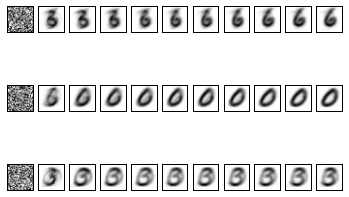

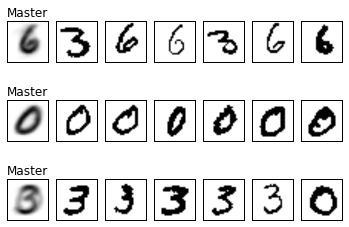

In [5]:
# トレーニングセットの読み込み
df = pd.read_csv('sample-images.txt', sep=",", header=None)
data_num = len(df)
# 初期パラメータの設定
mix = [1.0/K] * K
mu = (rand(28*28*K)*0.5+0.25).reshape(K, 28*28)
for k in range(K):
    mu[k] /= mu[k].sum()
fig = plt.figure()
for k in range(K):
    subplot = fig.add_subplot(K, N+1, k*(N+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(mu[k].reshape(28,28), cmap=plt.cm.gray_r)
fig.show()
# N回のIterationを実施
for iter_num in range(N):
    print("iter_num %d" % iter_num)
    # E phase
    resp = DataFrame()
    for index, line in df.iterrows():
        tmp = []
        for k in range(K):
            a = mix[k] * bern(line, mu[k])
            if a == 0:
                tmp.append(0.0)
            else:
                s = 0.0
                for kk in range(K):
                    s += mix[kk] * bern(line, mu[kk])
                tmp.append(a/s)
        resp = resp.append([tmp], ignore_index=True)

    # M phase
    mu = np.zeros((K, 28*28))
    for k in range(K):
        nk = resp[k].sum()
        mix[k] = nk/data_num
        for index, line in df.iterrows():
            mu[k] += line * resp[k][index]
        mu[k] /= nk

        subplot = fig.add_subplot(K, N+1, k*(N+1)+(iter_num+1)+1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(mu[k].reshape(28,28), cmap=plt.cm.gray_r)
    fig.show()
# トレーニングセットの文字を分類
cls = []
for index, line in resp.iterrows():
    cls.append(np.argmax(line[0:]))
# 分類結果の表示
show_figure(mu, cls)